# Deep Learning
## 3️⃣ Types of Neural Networks

### Preprocessing for image classification

- **Resize** every image to same size, and unify the number of pixels.
- Unify the way **colors** are expressed (i.e. RGB, HSV, Gray-scale, Binary, ...)


### CNN (Convolution Neural Network)

#### Structure of CNN

- Convolution Layer

The process of finding out what features are in the image.   
The filter moves across the image to create a feature map.

- Pooling Layer

The process of minimalizing the effect of noise of image.   
Pooling layers reduce the dimensions of data by combining the outputs of neuron clusters at one layer into a single neuron in the next layer.

- FC (Fully-Connected Layer)

Using extracted features, FC classifies images. 
Uses Softmax function as activation function.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

# Function for visualization
def Visulaize(histories, key='loss'):
    for name, history in histories:
        plt.plot(history.epoch, history.history[key], 
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])    
    plt.show

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

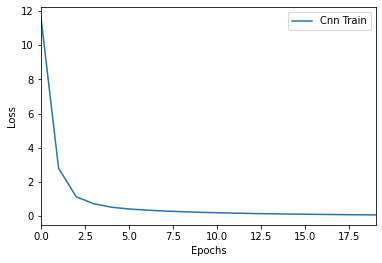

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

np.random.seed(123)
tf.random.set_seed(123)


# Load MNIST data set
mnist = tf.keras.datasets.mnist

# Split data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    

# Use 5000 data for training, and 1000 data for test.
train_images, train_labels = train_images[:5000], train_labels[:5000]
test_images, test_labels = test_images[:1000], test_labels[:1000]

# Preprocess data : reshape the data into (number of sampels, width, height, 1) shape to use as input data for CNN model.
train_images = tf.expand_dims(train_images, -1)
test_images = tf.expand_dims(test_images, -1)


"""
1. Create CNN model. 

Conv2D(filters, kernel_size, activation, padding) creates Convolution layer.
(filters: number o filters, kernel_size: size of filter, activation: activation function, padding: 'SAME' or 'VALID')

MaxPool2D(padding) creates Pooling layer.
(padding: 'SAME' or 'VALID')

Flatten() flattens output of convolution layer or pooling layer.

Dense(node, activation) creates FC. 
(node: number of nodes, activation: activation function)
"""
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

print(model.summary())

# Set a learning method for the CNN model.
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
              
# Train the model. 
history = model.fit(train_images, train_labels, epochs = 20, batch_size = 512)

# Print the result of training.
Visulaize([('CNN', history)], 'loss')

In [5]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import tensorflow as tf
from tensorflow.keras import models
import matplotlib.pyplot as plt

def Plotter(test_images, model):

    img_tensor = test_images[0]
    img_tensor = np.expand_dims(img_tensor, axis=0) 
    
    layer_outputs = [layer.output for layer in model.layers[:6]]
    activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

    activations = activation_model.predict(img_tensor)
    
    layer_names = []
    for layer in model.layers[:6]:
        layer_names.append(layer.name)
    
    images_per_row = 16

    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]
    
        size = layer_activation.shape[1]
    
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))
    
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
            
                channel_image -= channel_image.mean() 
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255.).astype('uint8')
            
                display_grid[col * size : (col+1) * size, row * size : (row+1) * size] = channel_image
            
        scale = 1. / size
        print('레이어 이름: ', layer_name)
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')
        plt.show()
        
    plt.show()


Test Loss : 0.2502 | Test Accuracy : 0.9190000295639038
Predicted data class :  [7 2 1 0 4 1 4 9 5 9]
레이어 이름:  conv2d


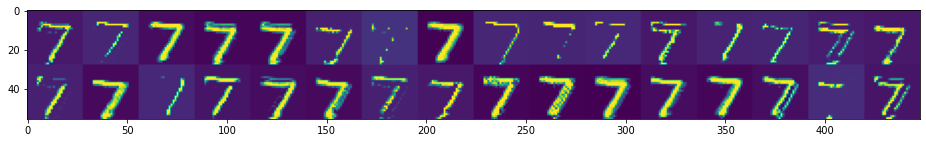

레이어 이름:  max_pooling2d


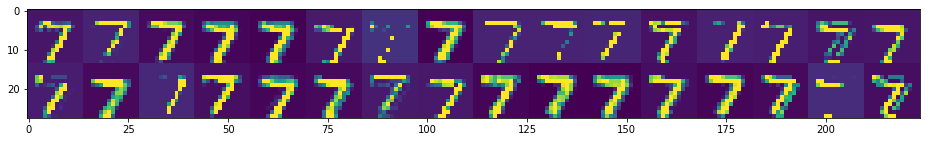

레이어 이름:  conv2d_1


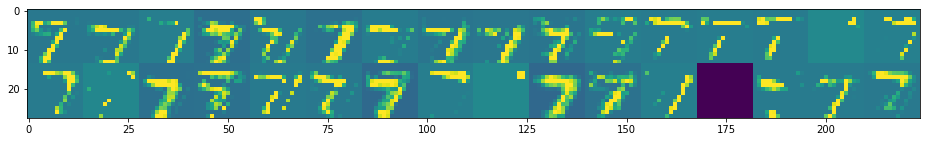

레이어 이름:  max_pooling2d_1


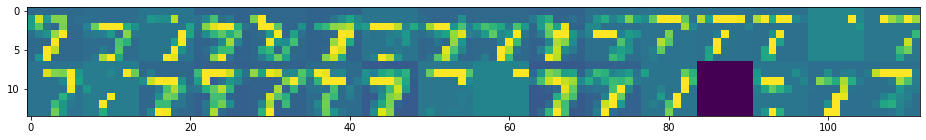

레이어 이름:  conv2d_2


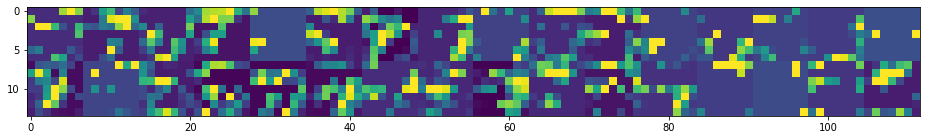

레이어 이름:  max_pooling2d_2


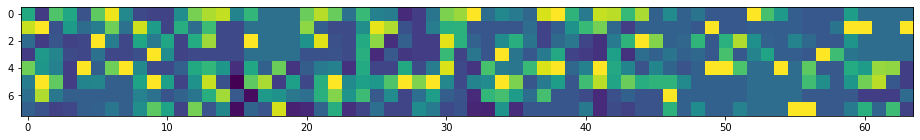

In [6]:
"""
1. Evaluate the model using data for test.
"""
loss, test_acc = model.evaluate(test_images, test_labels, verbose = 0)

"""
2. Save the result of prediction to predictions.
"""
predictions = model.predict_classes(test_images)

# Test the result of prediction and evaluation.
print('\nTest Loss : {:.4f} | Test Accuracy : {}'.format(loss, test_acc))
print('Predicted data class : ',predictions[:10])

# Visualize the layers of the model.
Plotter(test_images, model)


### Preprocessing for Natural Language Processing

#### Noise canceling

Check spelling of natural language sentences and correct spacing errors.   
(i.e. 'Heelo' -> 'Hello')

#### Tokenizing

Divide a sentence into **Tokens**. Tokens can be variously defined as phrases or words depending on the purpose.   
(i.e. 'I am cw00h.' -> ['I', 'am', 'cw00h'])

#### StopWord removal

StopWord refers to unnecessary words. Remove stopwords.   
(i.e. is, a, an, the, ...)

#### Token Sequence

**Bag of Words** is an expression of list of tokens that focuses only on the frequency of apperances of words without considering the order.   
(i.e. ['안녕', '만나서', '반가워], ['안녕', '나도', '반가워'] -> ['안녕':0, '만나서':1, '반가워':2, '나도':3])


Using the index of bag of words, data can be transformed into **token sequence** by converting the words in each sentence to the corresponding index in BoW.   
(i.e. ['안녕', '만나서', '반가워'], ['만나서', '반가워', '안녕'] -> [0, 1, 2], [1, 2, 0])

To match the length of all sentences, padding is inserted in sentences shorter than the standard.   
(i.e. ['안녕, '반가워'] -> [0, 2, **4**])

#### Word Embedding

**Word Embedding** refers to expressing the words in BoW in form of vectors using various methods.    
(i.e. ['어머니':0, '아버지':1, '친구':2, ...] -> 0:[1,3,0,-2,0,0] 1:[2,2,0,-1,0,0] 2:[0,0,1,-1,-2,0])


#### RNN(Recurrent Neural Network)

<img src = "./RNN.png" width = "300" />

**RNN** refers to neural network whose node divides the output value into two and hands over one value to the next node to give the neural network a function to remember.

If list of words after word embedding is input to RNN, loss value is calculated at the last node. 

In [8]:
import json
import numpy as np
import tensorflow as tf
from keras.datasets import imdb
from keras.preprocessing import sequence

import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# 데이터를 불러오고 전처리하는 함수입니다.

n_of_training_ex = 5000
n_of_testing_ex = 1000

PATH = "./data/"

def imdb_data_load():

    X_train = np.load(PATH + "X_train.npy")[:n_of_training_ex]
    y_train = np.load(PATH + "y_train.npy")[:n_of_training_ex]
    X_test = np.load(PATH + "X_test.npy")[:n_of_testing_ex]
    y_test = np.load(PATH + "y_test.npy")[:n_of_testing_ex]

    # 단어 사전 불러오기
    with open(PATH+"imdb_word_index.json") as f:
        word_index = json.load(f)
    # 인덱스 -> 단어 방식으로 딕셔너리 설정
    inverted_word_index = dict((i, word) for (word, i) in word_index.items())
    # 인덱스를 바탕으로 문장으로 변환
    decoded_sequence = " ".join(inverted_word_index[i] for i in X_train[0])

    
    print("첫 번째 X_train 데이터 샘플 문장: \n",decoded_sequence)
    print("첫 번째 y_train 데이터: ",y_train[0])
    
    return X_train, y_train, X_test, y_test

In [12]:
import json
import numpy as np
import tensorflow as tf
from keras.datasets import imdb
from keras.preprocessing import sequence

import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

np.random.seed(123)
tf.random.set_seed(123)

# Load Data
X_train, y_train, X_test, y_test = imdb_data_load()

max_review_length = 300

# Add padding to token sequence.
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length, padding='post')
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length, padding='post')


embedding_vector_length = 32

"""
1. Create RNN model.
   First add embedding layer, then add RNN layer.
   Since the output of model is 0 or 1, set the number of nodes in dense layer to 1, and set activation function to 'sigmoid'.
"""
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(1000, embedding_vector_length, input_length = max_review_length),
    tf.keras.layers.SimpleRNN(5),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

# Check the model
print(model.summary())

# Train the model.
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_history = model.fit(X_train, y_train, epochs = 3, verbose = 2)

첫 번째 X_train 데이터 샘플 문장: 
 the as you with out themselves powerful and and their becomes and had and of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every and and movie except her was several of enough more with is now and film as you of and and unfortunately of you than him that with out themselves her get for was and of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of and and with heart had and they of here that with her serious to have does when from why what have and they is you that isn't one will very to as itself with other and in of seen over and for anyone of and br and to whether from than out themselves history he name half some br of and and was two most of mean for 1 any an and she he should is thought and but of script you not while history he heart to real at and but when from one bit then have two of script their with her and mo

In [14]:

"""
1. Evaluate the model.
"""
loss, test_acc = model.evaluate(X_test, y_test, verbose = 0)

"""
2. Save the predicted value to predictions.
"""
predictions = model.predict(X_test)

# 모델 평가 및 예측 결과를 출력합니다.
print('\nTest Loss : {:.4f} | Test Accuracy : {}'.format(loss, test_acc))
print('Predicted test class : ',1 if predictions[0]>=0.5 else 0)



Test Loss : 0.6828 | Test Accuracy : 0.5720000267028809
Predicted test class :  0
